DAMI course 2024
Assignment: Basic neural network with Digits dataset

For this assignment, you are expected to create a basic neural network using the Digits dataset. The goal is to demonstrate and analyze the performance of this network. 

In the assignment, you should write your code where the [your code here] placeholder is present.

In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/maximiliansajonz/Documents/GitHub/DAMI-Python-Assignments/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load the digits dataset
digits_data = load_digits()
X, y = digits_data.data, digits_data.target
# X = X / 16.0

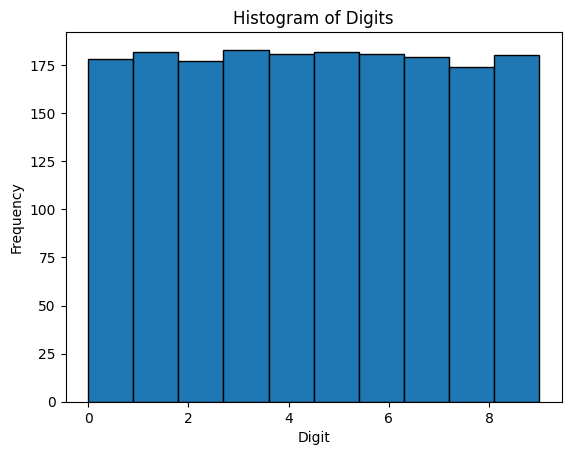

In [3]:
# Show a historam of dataset
plt.hist(y, bins=10, edgecolor='black')
plt.title('Histogram of Digits')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

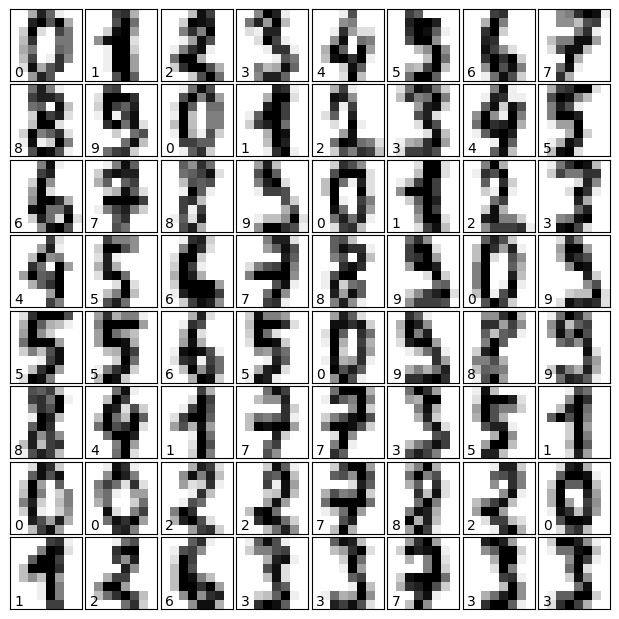

In [4]:
# Plot first 64 instances
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits_data.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits_data.target[i]))

In [5]:
# Split the data into train and temporary sets (80:20)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", len(X_train))
print("Temporary set size:", len(X_temp))

Train set size: 1437
Temporary set size: 360


In [6]:
# Split the temporary set into validation and test sets (50:50)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 1437
Validation set size: 180
Test set size: 180


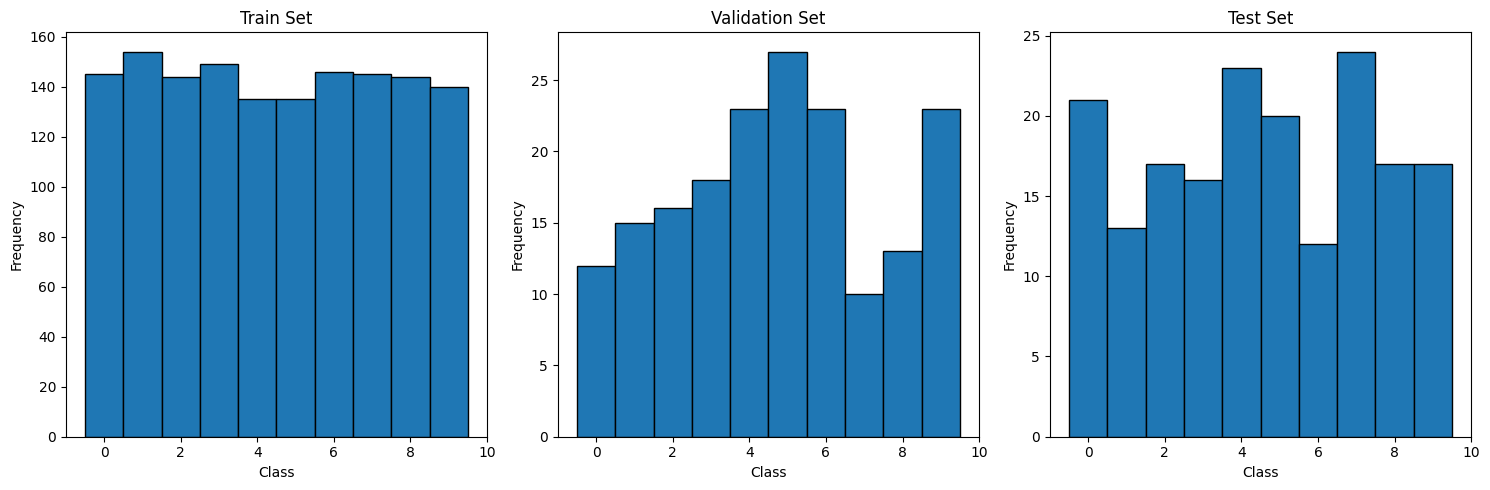

In [7]:
# Show a histogram of train, validation and test data

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=range(11), edgecolor='black', align='left')
plt.title('Train Set')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(y_val, bins=range(11), edgecolor='black', align='left')
plt.title('Validation Set')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(y_test, bins=range(11), edgecolor='black', align='left')
plt.title('Test Set')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [21]:
# One-hot encode the labels
from sklearn.preprocessing import OneHotEncoder
import numpy as np

y_train_encoded = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Verify the encoding
print("Example of one-hot encoded labels (first 5 entries):")
print("Train:", y_train_encoded[:5])
print("Validation:", y_val_encoded[:5])
print("Test:", y_test_encoded[:5])


Example of one-hot encoded labels (first 5 entries):
Train: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Validation: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Test: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [22]:
# Define a simple neural network

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(64,)),  # 64 input features (8x8 images flattened)
    tf.keras.layers.Dense(64, activation='relu'),   # First hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),   # Second hidden layer with 32 units and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 units (one per class) and softmax activation
])


/Users/maximiliansajonz/Documents/GitHub/DAMI-Python-Assignments/.venv/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [23]:
# Compile the model
model.compile(optimizer='adam',               # Adam optimizer
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy'])            # Metric to monitor

In [33]:
# Train the model

history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded))


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.4477e-04 - val_accuracy: 0.9722 - val_loss: 0.1519
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 1.0000 - loss: 1.6506e-04 - val_accuracy: 0.9722 - val_loss: 0.1515
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 1.0000 - loss: 1.2661e-04 - val_accuracy: 0.9722 - val_loss: 0.1524
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 1.0000 - loss: 1.3222e-04 - val_accuracy: 0.9722 - val_loss: 0.1526
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 1.0000 - loss: 1.2587e-04 - val_accuracy: 0.9722 - val_loss: 0.1527
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 1.0000 - loss: 1.3945e-04 - val_accuracy: 0.9722 - val_loss: 0.1525
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 1.0000 - loss: 1.2480e-04 - val_accuracy: 0.9722 - val_loss: 0.1531
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 1.0000 - loss:

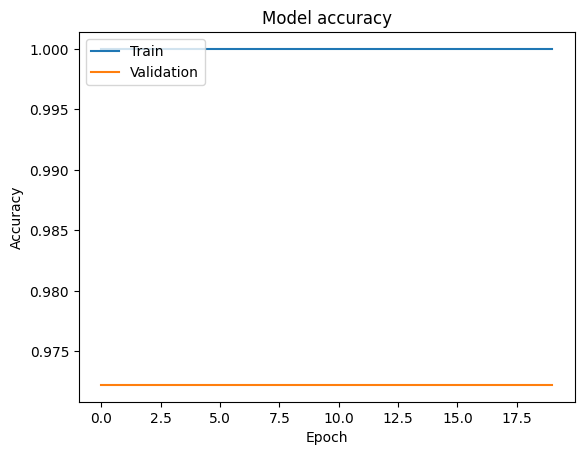

In [35]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [36]:
# Evaluate the model

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')


6/6 - 0s - 2ms/step - accuracy: 0.9667 - loss: 0.0766
Test accuracy: 0.9667


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


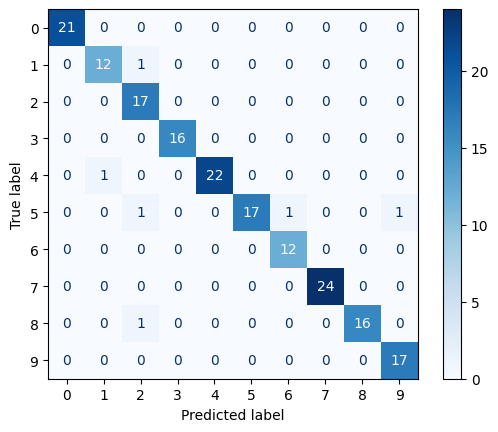

In [14]:
# Get the model's predictions
from sklearn.metrics import ConfusionMatrixDisplay


predictions = model.predict(X_test)


# Convert the predictions from categorical to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the test labels from categorical to class labels
true_classes = np.argmax(y_test_encoded, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()



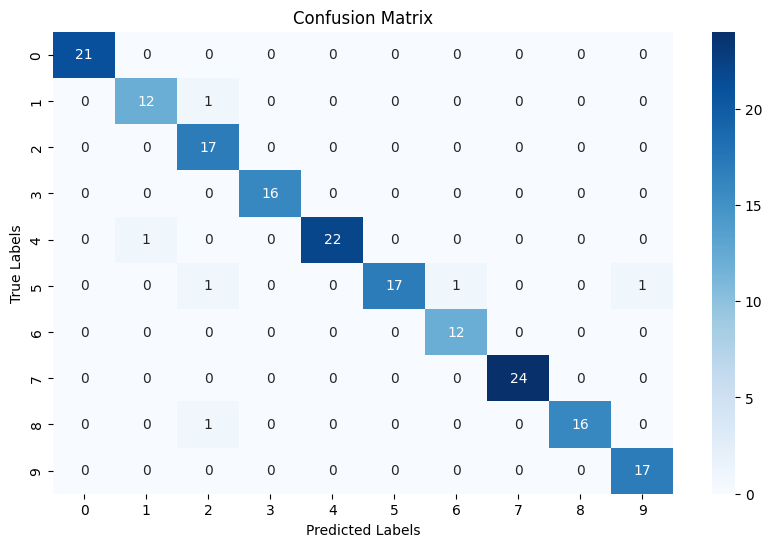

In [15]:
# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()